In [1]:
#!pip install --upgrade oct2py
import numpy as np
import pandas as pd
from oct2py import octave
import matplotlib.pyplot as plt
import os
from scipy.optimize import root
import pickle
octave.addpath('C:/dynare/6.1/matlab')  
#octave.addpath('/opt/homebrew/opt/dynare/lib/dynare/matlab')

    _pyeval at line 57 column 30

    _pyeval at line 57 column 30



'.;C:\\Users\\blankenw\\AppData\\Local\\anaconda3\\Lib\\site-packages\\oct2py;C:\\Users\\blankenw\\AppData\\Local\\anaconda3\\Lib\\site-packages\\octave_kernel;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\9.1.0\\site\\oct\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\site\\oct\\api-v59\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\site\\oct\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\9.1.0\\site\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\api-v59\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m\\once_only;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m\\startup;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\9.1.0\\oct\\x86_64-w64-mingw32;C:\\Program Fi

`DyPy` is a class that we create and store in a file called `MyPy.py`. It contains methods for 

* converting data from a Dynare stucture to Numpy arrays.
* analyzing the data. 

See the file for details. 

In [2]:
from MyPy import DyPy

Creates a file called `t_call.m`. This informs Dynare of the format we want for output. It is put here so that adjusments can be made easily; for example the number of periods can be changed here rather than by looking at the `.mod` file. It is included in the `.mod` file via: `@#include "t_call.m"` in `model_1.mod`

* `order`: the order of approximation for the stochastic simulation. order=1 is a fsrst-order approximation (linearization) Higher-order approximations (e.g., order=2 for second-order) capture nonlinear effects in the model, but they require more computational resources.
* `periods`: number of periods (time steps) for which the simulation will be run. periods=1000 means that the model will be simulated for 1000 periods. The default value is 0, which means no simulation will be performed.
* `nograph`: suppresses the graphical output of the simulation results in Dynare since we draw them separatetly. 
* `irf`: the number of periods for which the impulse response functions (IRFs) will be computed and plotted. 

In [3]:
with open('t_call.m', 'w') as file:
    file.write("stoch_simul(nograph, order=1, periods=10000, irf=100);")

 `make_model.ipyn` writes a file called `t_model.m`. `t_model.m`is the `model` block in the Dynare `.mod` file. It can instead be created directlty by commenting out the next `%run` line and coding the model. `make_model.ipyn` simplifies model creation when many of the lines are very similar to each other. Then they can be written in for loops. For the model we are currently working with, there is not much advantage to writing the file via `make_model` but I have done so nonetheless. 
 
 The created file is included in the `.mod` file via `@#include "t_model.m"` in `model_1.mod`. 

In [4]:
%run make_model.ipynb

`make_files.ipynb` writes the other Dynare blocks. See that file for details. However, note that in doing so, it solves for the steady state of the model using `root` from `scipy`. If the results below do not indicate success, the `.mod` file may not run correctly. Also, note that though we solve for the steady state here, we do not give Dynare the steady state but rather use these as starting values for their ss solver. I will later code a verification the steady states are the same. 

In [5]:
%run make_files_1.ipynb

eps,tht,alf,bet,om_0,om_1,om_2,delt,psi_n,psi_k,var_a_0,var_a_1,var_a_2,rho_a_0,rho_a_1,rho_a_2


Tells octave where to find the .m file it will run. The file is `call_dynare`. Set to wherever you have this file. 




In [6]:
#a=octave.addpath(os.path.expanduser('C:/Users/blankenw/GitHub/dynare_progs/np_1'))

Makes a call to Octave, which makes a call to Dynare. Then the `.mod` file is run in Dynare. Output from Dynare is displayed as it runs.

In [7]:

# A list of dictionaries representing updates to apply to my_dict:
new_pars = [{'psi_n': 0, 'psi_k': 0}, 
           {'psi_n': 2, 'psi_k': 0}, 
           {'psi_n': 0, 'psi_k': 2}]



# Create an empty dictionary to store your variables
t=[]
with open('mf1.pkl', 'wb') as f:
    pickle.dump((ss_params,model_params,ss_shock), f)


for i, update in enumerate(new_pars):
    model_params.update(update)
    with open('mf1.pkl', 'wb') as f:
        pickle.dump((ss_params,model_params,ss_shock), f)
    %run make_files_2.ipynb
    with open('mf2.pkl', 'rb') as f:
        ss_dict = pickle.load(f)
    # Set up Octave session and run your model
    octave.dynare('model_1.mod')

    # Pull necessary structures
    oo = octave.pull('oo_')
    M_ = octave.pull('M_')
    instance = DyPy(oo,ss_dict)
    if i==0:
        oo_0=oo
    t.append(instance)


 message: The solution converged.
 success: True
  status: 1
     fun: [-1.110e-16  0.000e+00 ... -2.920e-14  2.132e-14]
       x: [ 4.368e-01  2.816e-01 ...  8.740e-01  4.816e-01]
    nfev: 43
    fjac: [[-5.762e-02 -1.287e-10 ... -3.694e-03 -4.150e-03]
           [-4.342e-02  8.220e-11 ...  5.547e-02  1.925e-03]
           ...
           [-3.699e-01 -2.624e-01 ... -2.441e-01 -2.463e-01]
           [ 7.267e-02 -7.356e-02 ...  1.403e-03  3.352e-03]]
       r: [-1.736e+01  1.018e+00 ...  4.769e-01  1.971e-01]
     qtf: [-2.940e-11  7.020e-11 ... -4.667e-13  4.077e-13]
Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Found 17 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
5 block(s) found:
  4 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 11 equation(s)
   

Dynare creates a `structure` which we will need so we `pull` it.

The output from Dynare is stored in a file called `oo_`. This brings `oo_` in as `oo`.

Draw all impulse response functions. 

In [8]:
def plot_dta(instances, attributes,periods=100):
    plt.figure(figsize=(15, 5))
    for j, attribute in enumerate(attributes):
        # Create a subplot for this attribute
        plt.subplot(1, len(attributes), j+1)
        for i, instance in enumerate(instances):
            # Get the attribute value (time series data)
            attr_value = getattr(instance.ir_level, attribute)
            attr_value = attr_value.reshape(-1, 1)
            length = attr_value.shape[0]
            tm = np.linspace(1, length, length)
            # Add a line to the plot for this time series
            plt.plot(tm[0:periods], attr_value[0:periods], label=labels[i])

        plt.title(attribute)
        plt.legend()

    # Show the figure with all subplots


In [9]:
n00=[]
s00=[]
for instance in t:
    n00.append(instance.ir_level.n_0_a_0)
    s00.append(instance.ir_level.s_0_a_0)
    

In [10]:
t[0].ir_level.n_0_a_0+t[0].ir_level.n_1_a_0+t[0].ir_level.n_2_a_0

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [11]:
t[0].ir_level.c_0_a_0

array([[0.88093426, 0.98358552, 1.05638934, 1.10614956, 1.13823452,
        1.15687087, 1.16537801, 1.16635506, 1.16182999, 1.15337844,
        1.14221834, 1.12928532, 1.11529261, 1.10077865, 1.08614499,
        1.07168622, 1.05761379, 1.04407478, 1.03116678, 1.01894956,
        1.00745429, 0.99669072, 0.98665288, 0.9773234 , 0.96867696,
        0.96068286, 0.95330709, 0.94651377, 0.94026635, 0.93452844,
        0.9292644 , 0.92443979, 0.92002164, 0.91597867, 0.91228138,
        0.90890209, 0.90581493, 0.90299585, 0.9004225 , 0.89807424,
        0.89593196, 0.8939781 , 0.89219645, 0.89057215, 0.88909155,
        0.88774212, 0.88651241, 0.88539192, 0.88437105, 0.88344102,
        0.88259382, 0.88182211, 0.88111921, 0.88047902, 0.87989596,
        0.87936497, 0.87888141, 0.87844105, 0.87804005, 0.8776749 ,
        0.87734239, 0.87703963, 0.87676394, 0.87651291, 0.87628435,
        0.87607623, 0.87588674, 0.87571421, 0.87555711, 0.87541408,
        0.87528385, 0.87516528, 0.87505733, 0.87

In [12]:
n0=t[1].ir_level.n_0_a_0
s0=t[1].ir_level.s_0_a_0
c0=t[1].ir_level.c_0_a_0
newstuff=n0/s0
t[1].ir_level.nstuff=newstuff


In [13]:
for instance in t:
    #loop through the instances and create an attribute for each
    instance.ir_level.ns0_a0 = instance.ir_level.n_0_a_0/instance.ir_level.s_0_a_0
    instance.ir_level.ns1_a0 = instance.ir_level.n_1_a_0/instance.ir_level.s_1_a_0
    instance.ir_level.ns2_a0 = instance.ir_level.n_2_a_0/instance.ir_level.s_2_a_0
    
    instance.ir_level.ns0_a1 = instance.ir_level.n_0_a_1/instance.ir_level.s_0_a_1
    instance.ir_level.ns1_a1 = instance.ir_level.n_1_a_1/instance.ir_level.s_1_a_1
    instance.ir_level.ns2_a1 = instance.ir_level.n_2_a_1/instance.ir_level.s_2_a_1
    
    instance.ir_level.kn0_a1 = instance.ir_level.k_0_a_1/instance.ir_level.n_0_a_1
    instance.ir_level.kn1_a1 = instance.ir_level.k_1_a_1/instance.ir_level.n_1_a_1
    instance.ir_level.kn2_a1 = instance.ir_level.k_2_a_1/instance.ir_level.n_2_a_1
    
    
    instance.ir_level.y_0_a1 = instance.ir_level.c_0_a_1+instance.ir_level.i_a_1
    
    

In [14]:
instance.ir_level.k_1_a_0

array([[ 9.6313912 , 10.74819578, 11.56498876, 12.1470333 , 12.54617885,
        12.8035687 , 12.95180423, 13.01667488, 13.01854047, 12.97343584,
        12.89395318, 12.78994673, 12.66909545, 12.53735212, 12.3993016 ,
        12.25844663, 12.11743558, 11.97824385, 11.84231835, 11.71069231,
        11.58407657, 11.46293199, 11.34752686, 11.2379823 , 11.1343081 ,
        11.03643098, 10.94421675, 10.85748772, 10.77603617, 10.69963491,
        10.62804533, 10.56102358, 10.49832529, 10.43970903, 10.38493886,
        10.33378622, 10.28603112, 10.24146304, 10.19988135, 10.1610956 ,
        10.12492547, 10.09120072, 10.05976095, 10.03045526, 10.00314193,
         9.97768803,  9.95396896,  9.9318681 ,  9.91127632,  9.89209161,
         9.87421865,  9.85756839,  9.84205771,  9.82760904,  9.81415   ,
         9.80161308,  9.78993531,  9.77905798,  9.76892637,  9.75948947,
         9.75069972,  9.74251282,  9.73488748,  9.72778522,  9.72117019,
         9.71500901,  9.70927055,  9.70392584,  9.6

In [15]:
instance.ir_level.k_0_a_0

array([[ 9.6313912 , 10.74819578, 11.56498876, 12.1470333 , 12.54617885,
        12.8035687 , 12.95180423, 13.01667488, 13.01854047, 12.97343584,
        12.89395318, 12.78994673, 12.66909545, 12.53735212, 12.3993016 ,
        12.25844663, 12.11743558, 11.97824385, 11.84231835, 11.71069231,
        11.58407657, 11.46293199, 11.34752686, 11.2379823 , 11.1343081 ,
        11.03643098, 10.94421675, 10.85748772, 10.77603617, 10.69963491,
        10.62804533, 10.56102358, 10.49832529, 10.43970903, 10.38493886,
        10.33378622, 10.28603112, 10.24146304, 10.19988135, 10.1610956 ,
        10.12492547, 10.09120072, 10.05976095, 10.03045526, 10.00314193,
         9.97768803,  9.95396896,  9.9318681 ,  9.91127632,  9.89209161,
         9.87421865,  9.85756839,  9.84205771,  9.82760904,  9.81415   ,
         9.80161308,  9.78993531,  9.77905798,  9.76892637,  9.75948947,
         9.75069972,  9.74251282,  9.73488748,  9.72778522,  9.72117019,
         9.71500901,  9.70927055,  9.70392584,  9.6

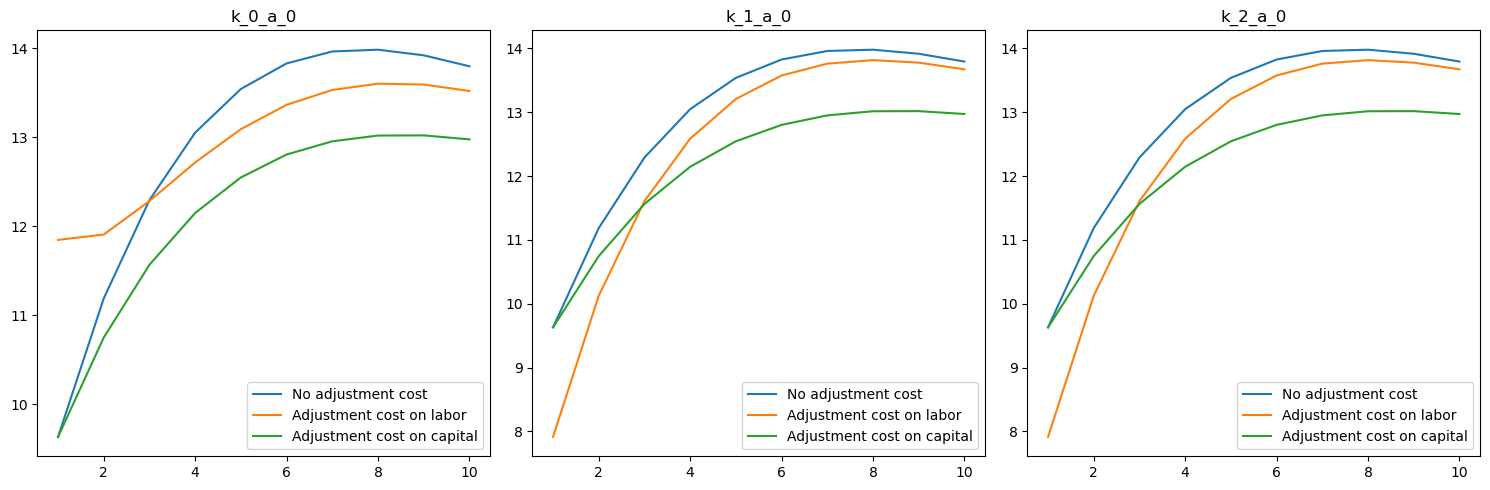

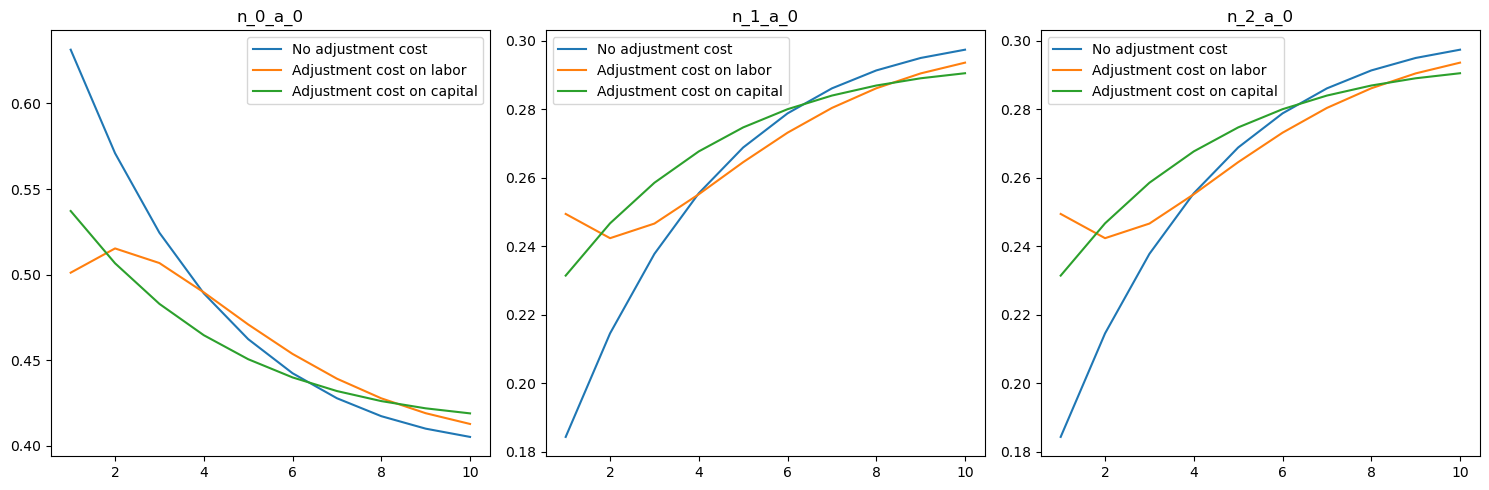

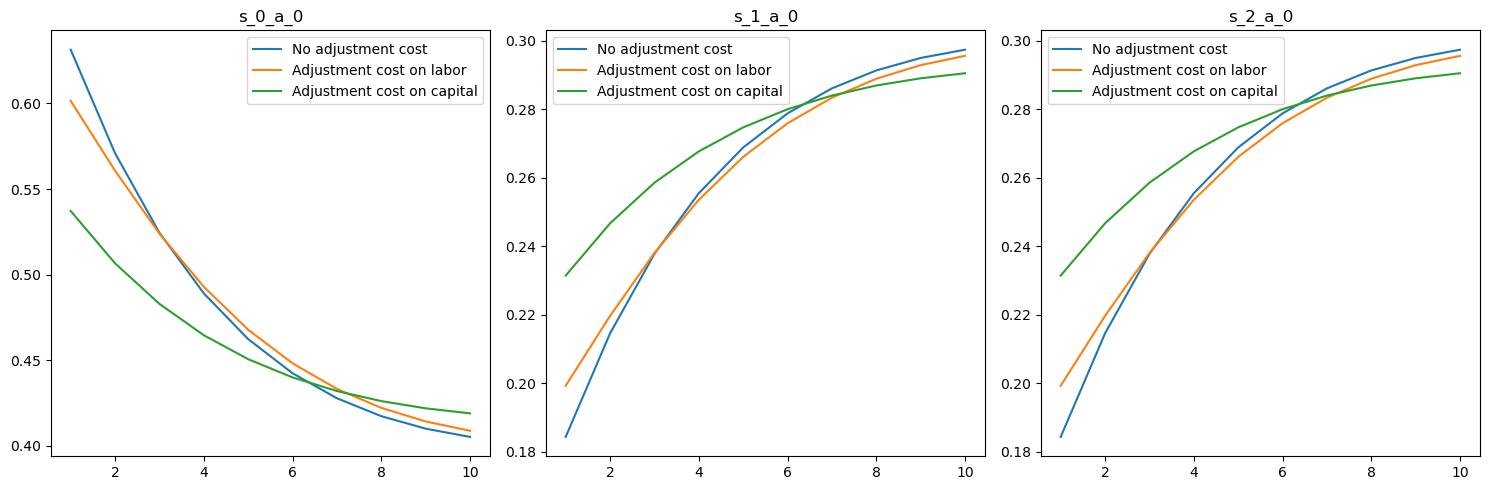

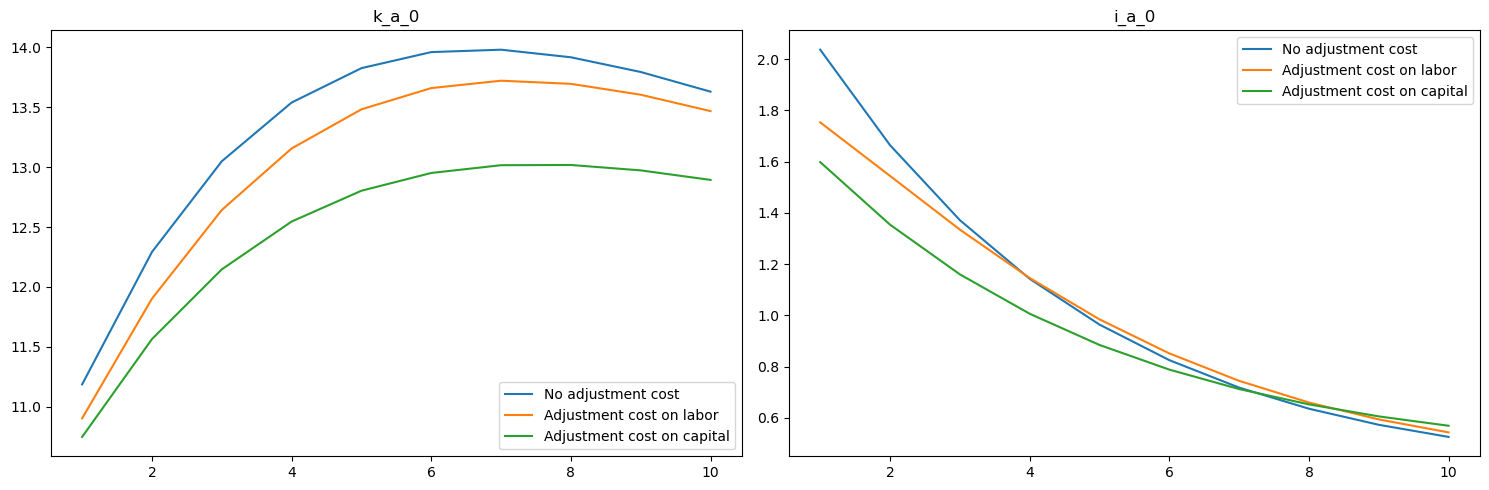

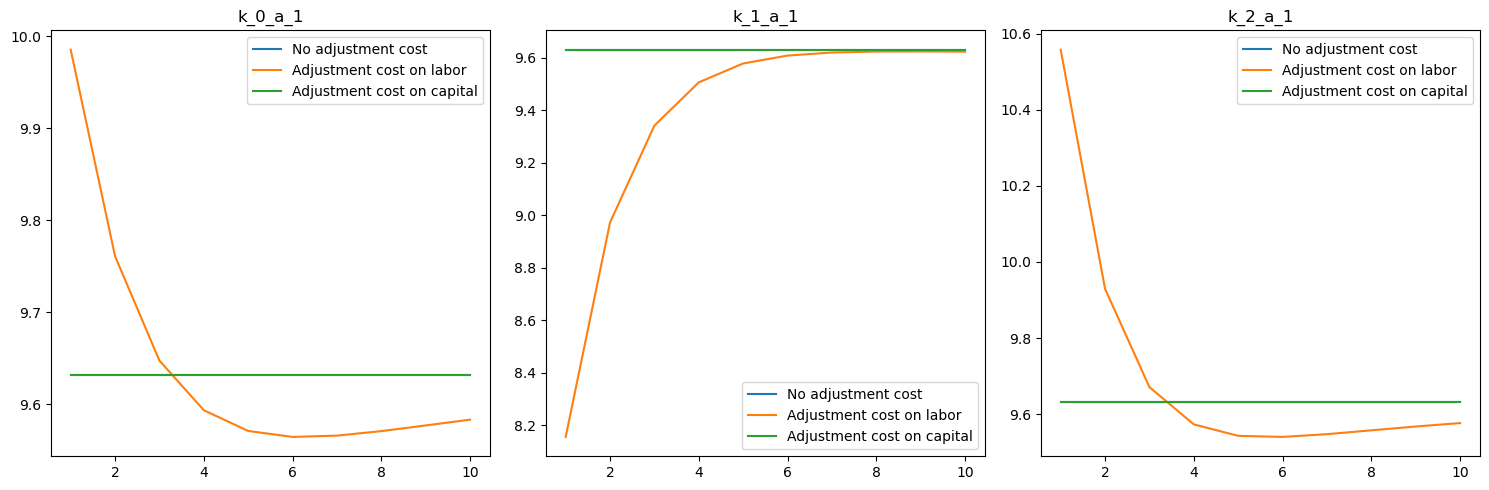

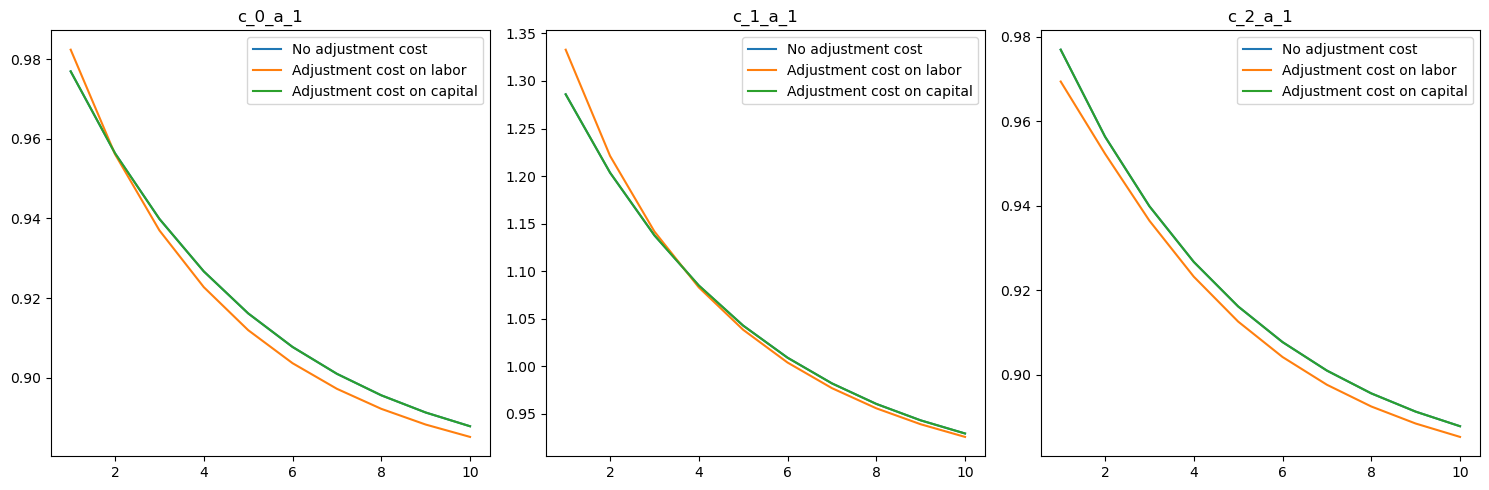

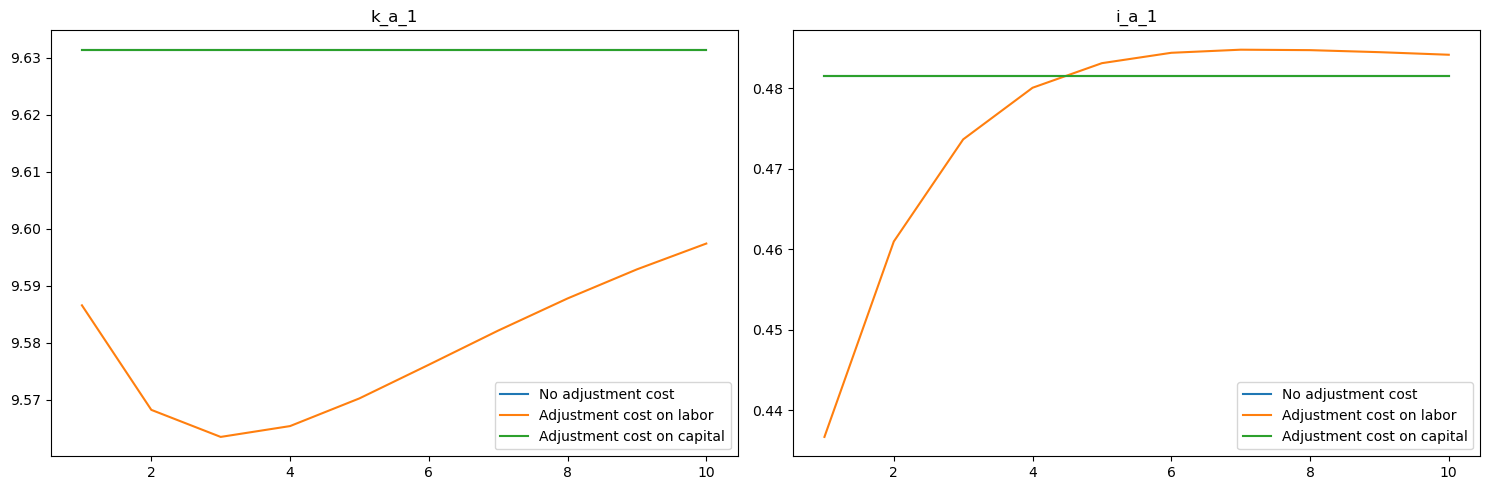

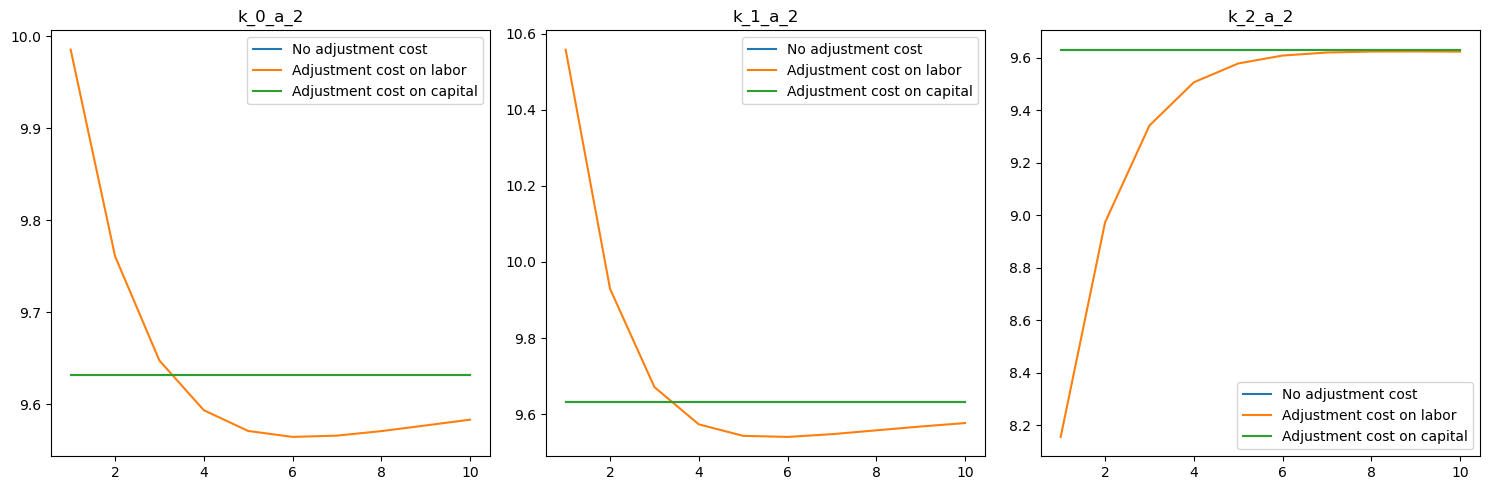

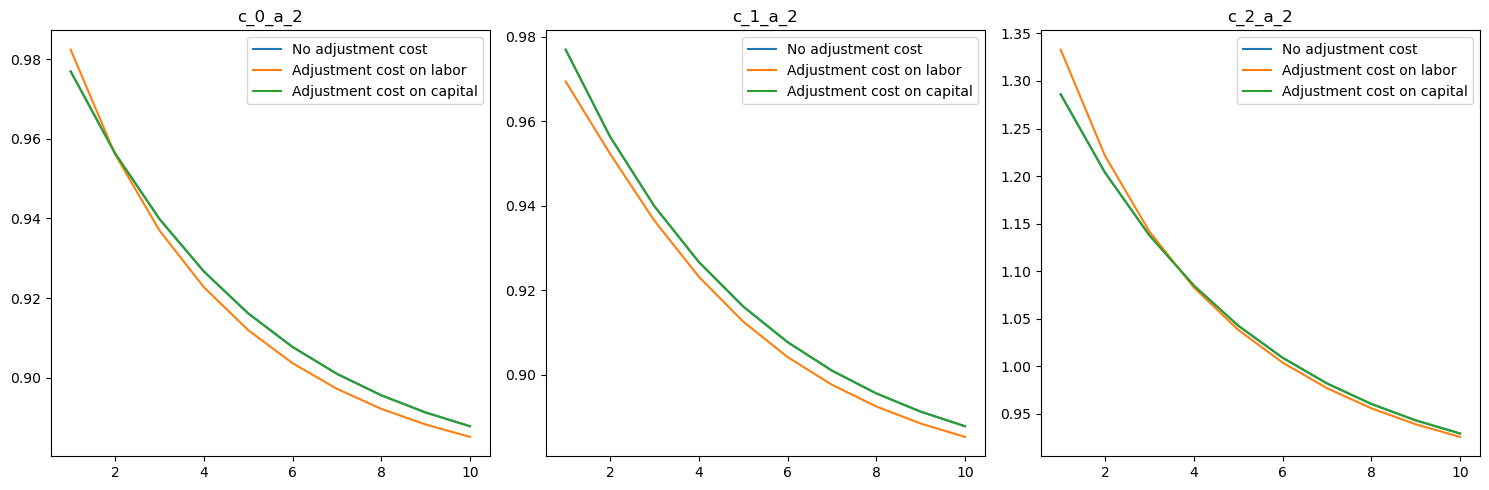

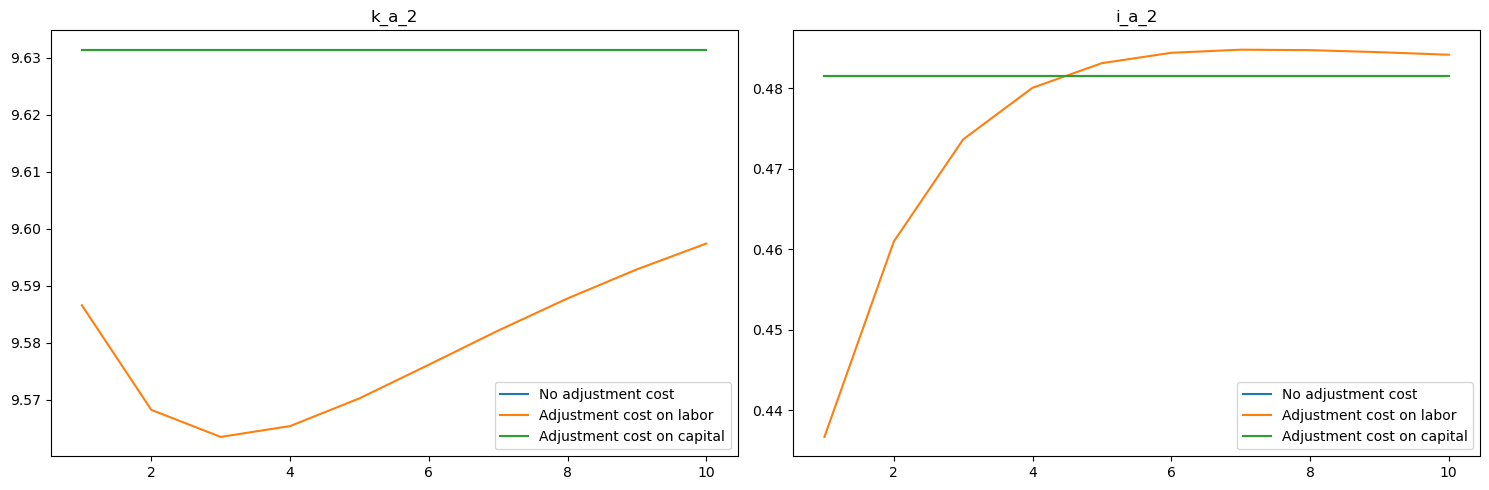

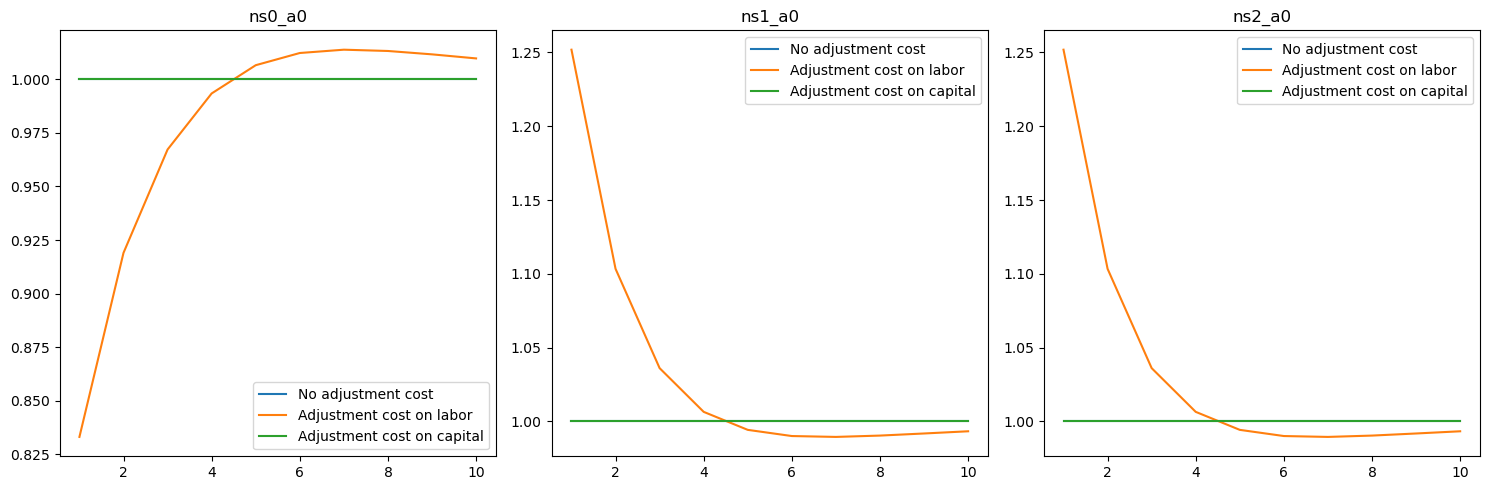

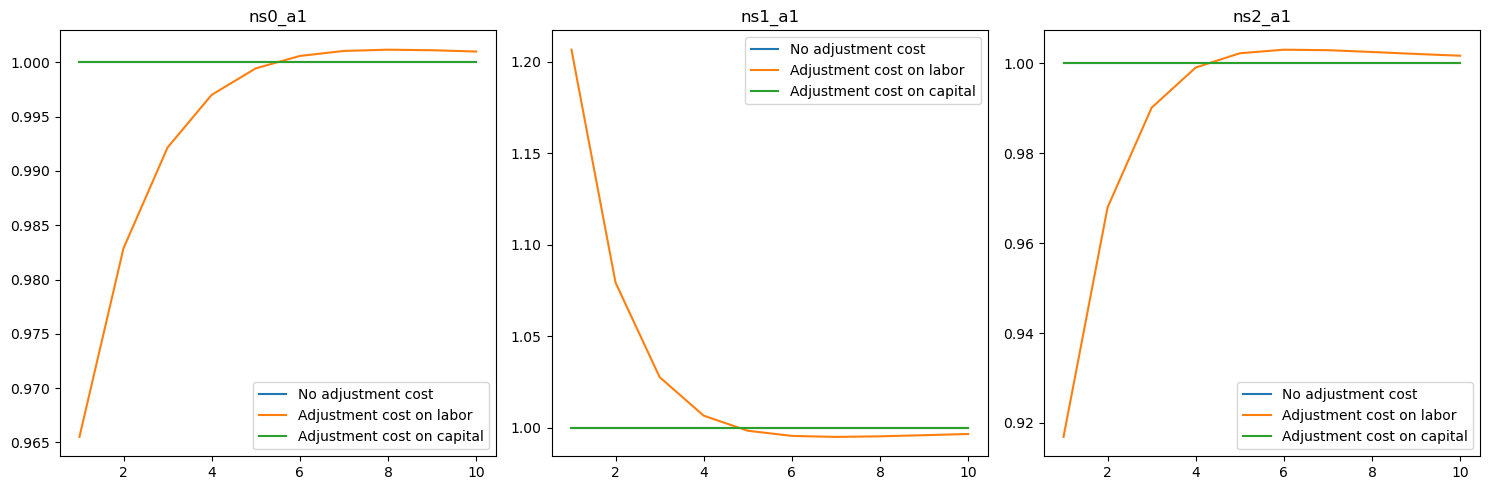

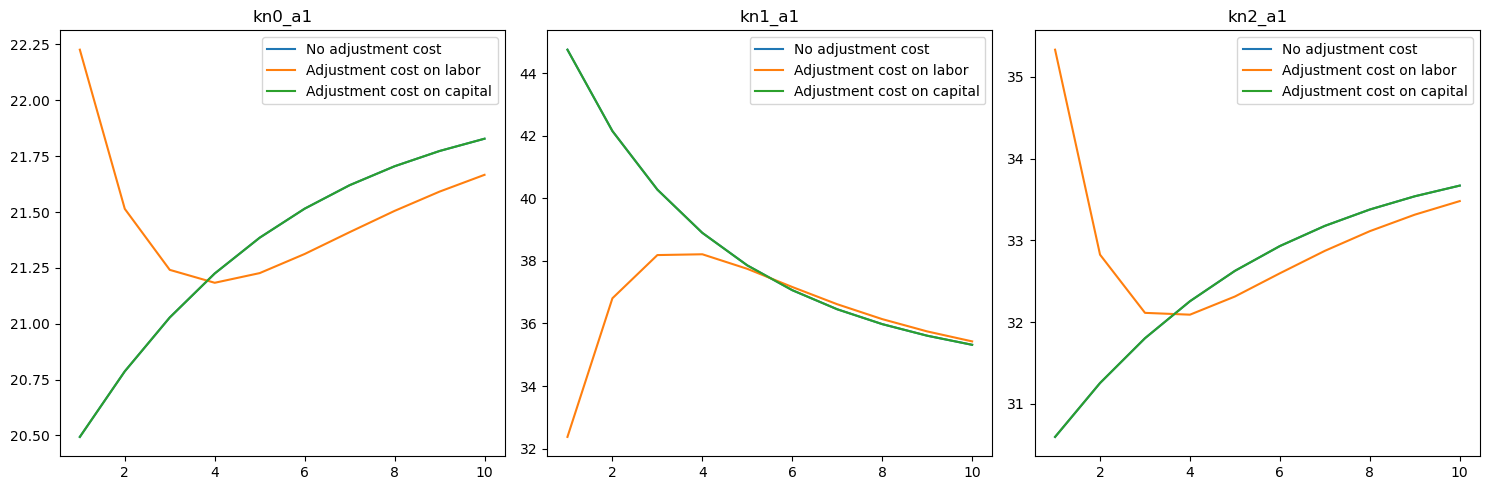

In [16]:
labels = ['No adjustment cost', 'Adjustment cost on labor', 'Adjustment cost on capital']

all_attributes =[['k_0_a_0', 'k_1_a_0', 'k_2_a_0'],
                    ['n_0_a_0', 'n_1_a_0', 'n_2_a_0'],
                    ['s_0_a_0', 's_1_a_0', 's_2_a_0'],
                    ['k_a_0', 'i_a_0'],
                    ['k_0_a_1', 'k_1_a_1', 'k_2_a_1'],
                    ['c_0_a_1', 'c_1_a_1', 'c_2_a_1'],
                    ['k_a_1', 'i_a_1'],
                    ['k_0_a_2', 'k_1_a_2', 'k_2_a_2'],
                    ['c_0_a_2', 'c_1_a_2', 'c_2_a_2'],
                    ['k_a_2', 'i_a_2'],
                    ['ns0_a0', 'ns1_a0', 'ns2_a0'],
                    ['ns0_a1', 'ns1_a1', 'ns2_a1'],
                    ['kn0_a1', 'kn1_a1', 'kn2_a1'],
                     ]
for attributes in all_attributes:
    plot_dta(t, attributes,periods=10)
    plt.tight_layout()
    plt.show()                  



In [17]:
n_0=t[0].ir_level.n_0_a_0
n_1=t[0].ir_level.n_1_a_0
n_2=t[0].ir_level.n_2_a_0
s_0=t[0].ir_level.s_0_a_0
s_1=t[0].ir_level.s_1_a_0
s_2=t[0].ir_level.s_2_a_0
k_0=t[0].ir_level.k_a_0
k_0=t[0].ir_level.k_0_a_0
k_1=t[0].ir_level.k_1_a_0
k_2=t[0].ir_level.k_2_a_0
c_0=t[0].ir_level.c_0_a_0
c_1=t[0].ir_level.c_1_a_0
c_2=t[0].ir_level.c_2_a_0
i=t[0].ir_level.i_a_0
a_0=t[0].ir_level.a_0_a_0
a_1=t[0].ir_level.a_1_a_0
a_2=t[0].ir_level.a_2_a_0


In [18]:
t[0].ir_level.n_0_a_0

array([[0.63141458, 0.57091859, 0.52445331, 0.48903963, 0.46230975,
        0.44238354, 0.42776973, 0.41728701, 0.41000094, 0.40517368,
        0.40222378, 0.40069411, 0.40022628, 0.40054022, 0.40141795,
        0.40269061, 0.40422813, 0.40593102, 0.40772386, 0.40955012,
        0.411368  , 0.41314722, 0.41486642, 0.41651112, 0.41807209,
        0.41954412, 0.42092501, 0.42221478, 0.42341509, 0.42452874,
        0.42555932, 0.42651095, 0.42738802, 0.42819508, 0.42893669,
        0.42961736, 0.43024144, 0.43081312, 0.43133641, 0.43181508,
        0.43225267, 0.4326525 , 0.43301768, 0.43335107, 0.43365534,
        0.43393294, 0.43418616, 0.43441708, 0.43462762, 0.43481955,
        0.43499448, 0.4351539 , 0.43529917, 0.43543152, 0.43555211,
        0.43566195, 0.43576202, 0.43585316, 0.43593617, 0.43601178,
        0.43608063, 0.43614334, 0.43620044, 0.43625244, 0.43629979,
        0.43634291, 0.43638217, 0.43641793, 0.43645048, 0.43648012,
        0.43650711, 0.43653168, 0.43655406, 0.43

In [19]:
n_0

array([[0.63141458, 0.57091859, 0.52445331, 0.48903963, 0.46230975,
        0.44238354, 0.42776973, 0.41728701, 0.41000094, 0.40517368,
        0.40222378, 0.40069411, 0.40022628, 0.40054022, 0.40141795,
        0.40269061, 0.40422813, 0.40593102, 0.40772386, 0.40955012,
        0.411368  , 0.41314722, 0.41486642, 0.41651112, 0.41807209,
        0.41954412, 0.42092501, 0.42221478, 0.42341509, 0.42452874,
        0.42555932, 0.42651095, 0.42738802, 0.42819508, 0.42893669,
        0.42961736, 0.43024144, 0.43081312, 0.43133641, 0.43181508,
        0.43225267, 0.4326525 , 0.43301768, 0.43335107, 0.43365534,
        0.43393294, 0.43418616, 0.43441708, 0.43462762, 0.43481955,
        0.43499448, 0.4351539 , 0.43529917, 0.43543152, 0.43555211,
        0.43566195, 0.43576202, 0.43585316, 0.43593617, 0.43601178,
        0.43608063, 0.43614334, 0.43620044, 0.43625244, 0.43629979,
        0.43634291, 0.43638217, 0.43641793, 0.43645048, 0.43648012,
        0.43650711, 0.43653168, 0.43655406, 0.43

In [20]:
eps=ss_params['eps']
tht=ss_params['tht']
alf=ss_params['alf']
bet=ss_params['bet']
om_0=ss_params['om_0']
om_1=ss_params['om_1']
om_2=ss_params['om_2']
delt=ss_params['delt']
psi_n=ss_params['psi_n']
psi_k=ss_params['psi_k']


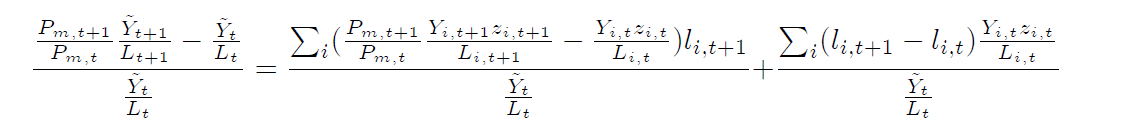

In [21]:
out=[]

In [22]:
L_0=n_0
L_1=n_1
L_2=n_2
z_0=1
z_1=(om_1*c_1**(-1/eps)) / (om_0*c_0**(-1/eps))
z_2=(om_2*c_2**(-1/eps)) / (om_0*c_0**(-1/eps))
y_0=c_0+i
y_1=c_1
y_2=c_2
Y=y_0*z_0+y_1*z_1+y_2*z_2
L=np.ones(Y.shape)
P=np.ones(Y.shape)
n_0plus = np.roll(n_0, -1)
n_1plus = np.roll(n_1, -1)
n_2plus = np.roll(n_2, -1)
L_0plus = np.roll(L_0, -1)
L_1plus = np.roll(L_1, -1)
L_2plus = np.roll(L_2, -1)
z_0plus = np.roll(z_0, -1)
z_1plus = np.roll(z_1, -1)
z_2plus = np.roll(z_2, -1)
y_0plus = np.roll(y_0, -1)
y_1plus = np.roll(y_1, -1)
y_2plus = np.roll(y_2, -1)
Yplus = np.roll(Y, -1)
Lplus=np.roll(L, -1)
Pplus=np.roll(P, -1)
LHS=(Pplus*Yplus/Lplus-Y/L)/(Y/L)
RHS1=     (Pplus*y_0plus*z_0plus/L_0plus-y_0*z_0/L_0)*n_0plus
RHS1=RHS1+(Pplus*y_1plus*z_1plus/L_1plus-y_1*z_1/L_1)*n_1plus
RHS1=RHS1+(Pplus*y_2plus*z_2plus/L_2plus-y_2*z_2/L_2)*n_2plus
RHS1=RHS1/(Y/L)

RHS2=     (n_0plus-n_0)*y_0*z_0/L_0
RHS2=RHS2+(n_1plus-n_1)*y_1*z_1/L_1
RHS2=RHS2+(n_2plus-n_2)*y_2*z_2/L_2
RHS2=RHS2/(Y/L)

LHS=LHS[:, :-1]
RHS1=RHS1[:, :-1]
RHS2=RHS2[:, :-1]

In [23]:
P

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [24]:
z_1

array([[2.37236589, 1.78404428, 1.51366923, 1.36163443, 1.26585611,
        1.20103061, 1.15497457, 1.12111273, 1.09558772, 1.07598758,
        1.06072629, 1.04871775, 1.0391931 , 1.03159298, 1.02550111,
        1.02060186, 1.01665222, 1.01346272, 1.01088416, 1.00879807,
        1.00710983, 1.00574343, 1.00463766, 1.00374304, 1.00301953,
        1.00243466, 1.0019621 , 1.0015805 , 1.0012725 , 1.00102406,
        1.00082377, 1.00066237, 1.00053239, 1.00042776, 1.00034357,
        1.00027587, 1.00022144, 1.0001777 , 1.00014256, 1.00011434,
        1.00009169, 1.00007351, 1.00005893, 1.00004723, 1.00003784,
        1.00003032, 1.00002429, 1.00001946, 1.00001558, 1.00001248,
        1.00000999, 1.000008  , 1.00000641, 1.00000513, 1.00000411,
        1.00000329, 1.00000263, 1.00000211, 1.00000169, 1.00000135,
        1.00000108, 1.00000086, 1.00000069, 1.00000055, 1.00000044,
        1.00000035, 1.00000028, 1.00000023, 1.00000018, 1.00000015,
        1.00000012, 1.00000009, 1.00000007, 1.00

In [25]:
mx=np.max(LHS-RHS1-RHS2)
mx

2.576960628562872e-16

In [26]:
out.append([LHS,RHS1,RHS2,Y,mx])

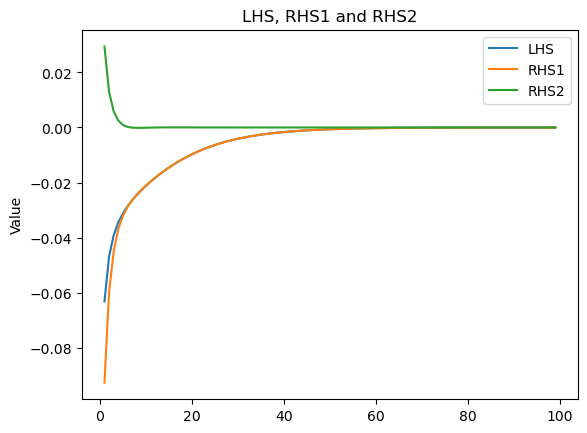

In [27]:

periods=LHS.shape[1]
# Create a series from 1 to periods
time_series = range(1, periods+1)

# Ensure LHS and RHS1 are 1-dimensional before slicing
plt.plot(time_series, LHS.flatten()[:periods], label='LHS')  
plt.plot(time_series, RHS1.flatten()[:periods], label='RHS1') 
plt.plot(time_series, RHS2.flatten()[:periods], label='RHS2')  
plt.legend()

plt.ylabel('Value')
plt.title('LHS, RHS1 and RHS2')
plt.show()

In [28]:
periods

99

In [29]:
intance=[0,1,2]
shock=[0,1,2]
output=[]
for i in intance:
    for j in shock:
        #extract the level values
        n0 = getattr(t[i].ir_level, f'n_0_a_{j}')
        n1 = getattr(t[i].ir_level, f'n_1_a_{j}')
        n2 = getattr(t[i].ir_level, f'n_2_a_{j}')
        c0 = getattr(t[i].ir_level, f'c_0_a_{j}')
        c1 = getattr(t[i].ir_level, f'c_1_a_{j}')
        c2 = getattr(t[i].ir_level, f'c_2_a_{j}')
        i_val = getattr(t[i].ir_level, f'i_a_{j}')
        L_0=n0
        L_0=n0
        L_1=n1
        L_2=n2
        y_0=c0+i_val
        y_1=c1
        y_2=c2
        z0=(om_0/om_0)*(c0/c0)**(-1/eps)
        z1=(om_1/om_0)*(c1/c0)**(-1/eps)
        z2=(om_2/om_0)*(c2/c0)**(-1/eps)
        ybar=y_0*z0 + y_1*z1 + y_2*z2
        L=np.ones(ybar.shape)
        P=np.ones(ybar.shape)
        n0plus=np.roll(n0,-1)
        n1plus=np.roll(n1,-1)
        n2plus=np.roll(n2,-1)
        L_0plus=np.roll(L_0,-1)
        L_1plus=np.roll(L_1,-1)
        L_2plus=np.roll(L_2,-1)
        z0plus=np.roll(z0,-1)
        z1plus=np.roll(z1,-1)
        z2plus=np.roll(z2,-1)
        y_0plus=np.roll(y_0,-1)
        y_1plus=np.roll(y_1,-1)
        y_2plus=np.roll(y_2,-1)
        ybarplus=np.roll(ybar,-1)
        Lplus=np.roll(L,-1)
        Pplus=np.roll(P,-1)
        #LHS
        eco_prod=(Pplus*ybarplus/Lplus- ybar/L)/(ybar/L)
#RHS1
        within= (Pplus*y_0plus*z0plus/L_0plus-y_0*z0/L_0)*n0plus
        within= within + (Pplus*y_1plus*z1plus/L_1plus-y_1*z1/L_1)*n1plus
        within= within + (Pplus*y_2plus*z2plus/L_2plus-y_2*z2/L_2)*n2plus
        within= within/(ybar/L)

#RHS2
        struc= (n0plus-n0)*y_0*z0/L_0
        struc=  struc + (n1plus-n1)*y_1*z1/L_1
        struc=  struc + (n2plus-n2)*y_2*z2/L_2
        struc=  struc/(ybar/L)

        eco_prod=eco_prod[:, :-1]
        within=within[:, :-1]
        struc=struc[:, :-1]
        mx=np.max(eco_prod-within-struc)
        output.append({f'eco_prod_{i}_{j}': eco_prod, f'within_{i}_{j}': within, f'struc_{i}_{j}': struc, f'max_{i}_{j}': mx})
        
        

In [30]:
L_0=n_0
L_1=n_1
L_2=n_2
z_0=1
z_1=(om_1*c_1**(-1/eps)) / (om_0*c_0**(-1/eps))
z_2=(om_2*c_2**(-1/eps)) / (om_0*c_0**(-1/eps))
y_0=c_0+i
y_1=c_1
y_2=c_2
Y=y_0*z_0+y_1*z_1+y_2*z_2
L=np.ones(Y.shape)
P=np.ones(Y.shape)
n_0plus = np.roll(n_0, -1)
n_1plus = np.roll(n_1, -1)
n_2plus = np.roll(n_2, -1)
L_0plus = np.roll(L_0, -1)
L_1plus = np.roll(L_1, -1)
L_2plus = np.roll(L_2, -1)
z_0plus = np.roll(z_0, -1)
z_1plus = np.roll(z_1, -1)
z_2plus = np.roll(z_2, -1)
y_0plus = np.roll(y_0, -1)
y_1plus = np.roll(y_1, -1)
y_2plus = np.roll(y_2, -1)
Yplus = np.roll(Y, -1)
Lplus=np.roll(L, -1)
Pplus=np.roll(P, -1)
LHS=(Pplus*Yplus/Lplus-Y/L)/(Y/L)
RHS1=     (Pplus*y_0plus*z_0plus/L_0plus-y_0*z_0/L_0)*n_0plus
RHS1=RHS1+(Pplus*y_1plus*z_1plus/L_1plus-y_1*z_1/L_1)*n_1plus
RHS1=RHS1+(Pplus*y_2plus*z_2plus/L_2plus-y_2*z_2/L_2)*n_2plus
RHS1=RHS1/(Y/L)

RHS2=     (n_0plus-n_0)*y_0*z_0/L_0
RHS2=RHS2+(n_1plus-n_1)*y_1*z_1/L_1
RHS2=RHS2+(n_2plus-n_2)*y_2*z_2/L_2
RHS2=RHS2/(Y/L)

LHS=LHS[:, :-1]
RHS1=RHS1[:, :-1]
RHS2=RHS2[:, :-1]

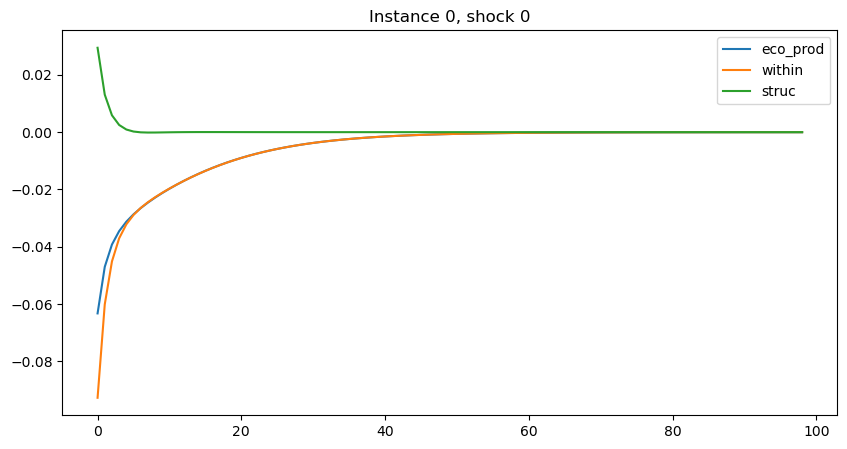

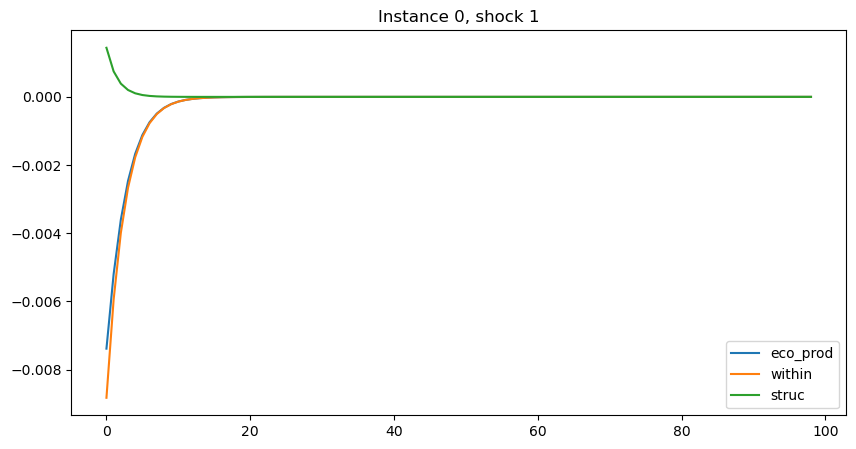

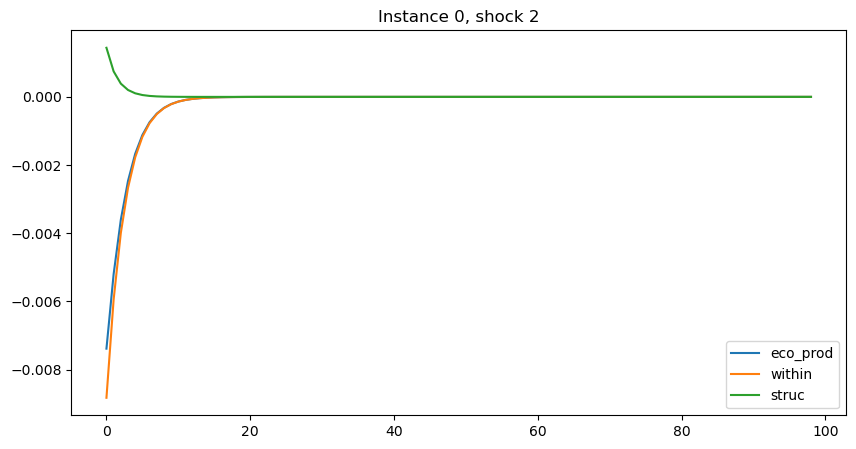

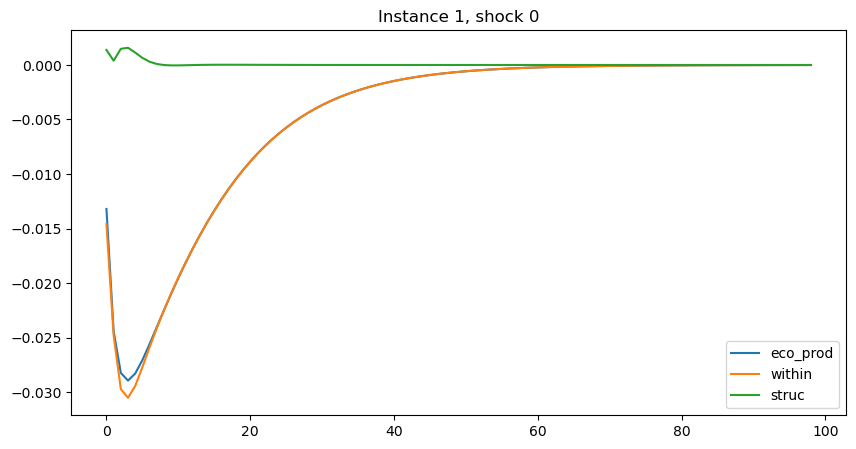

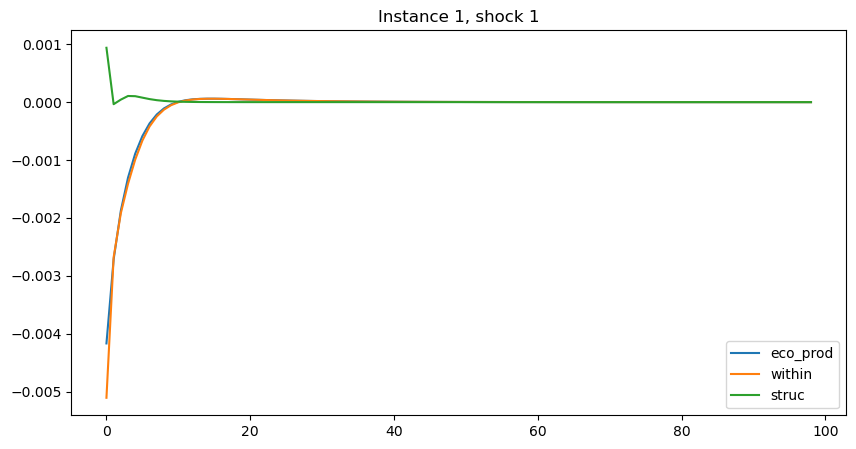

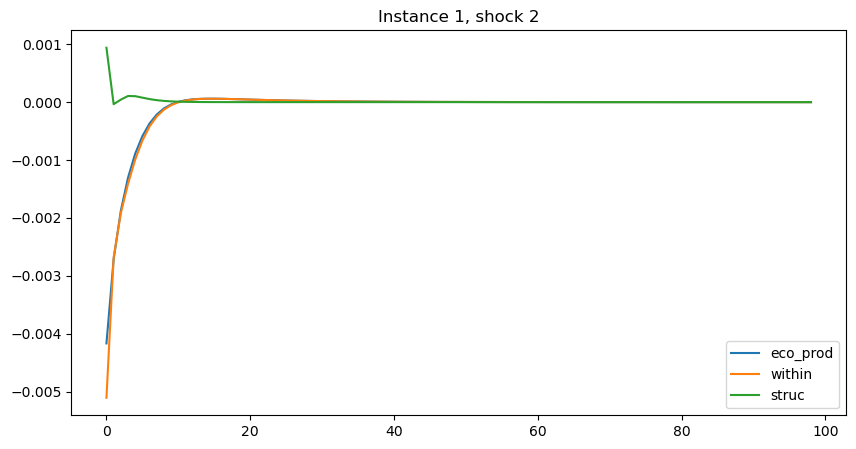

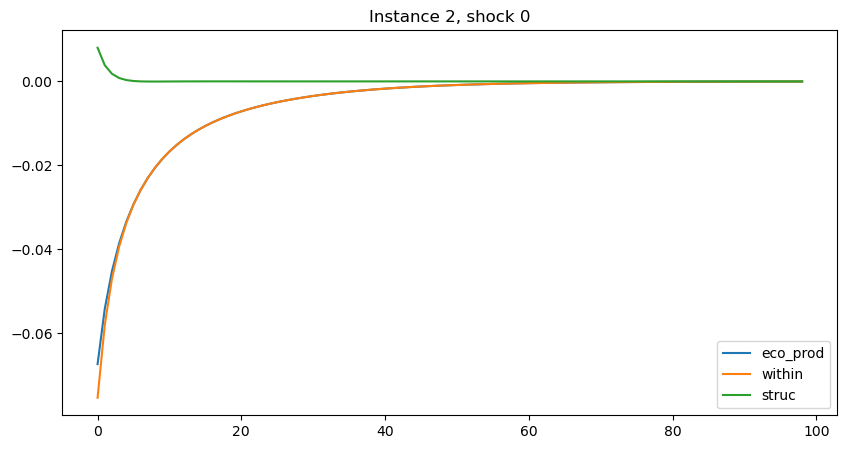

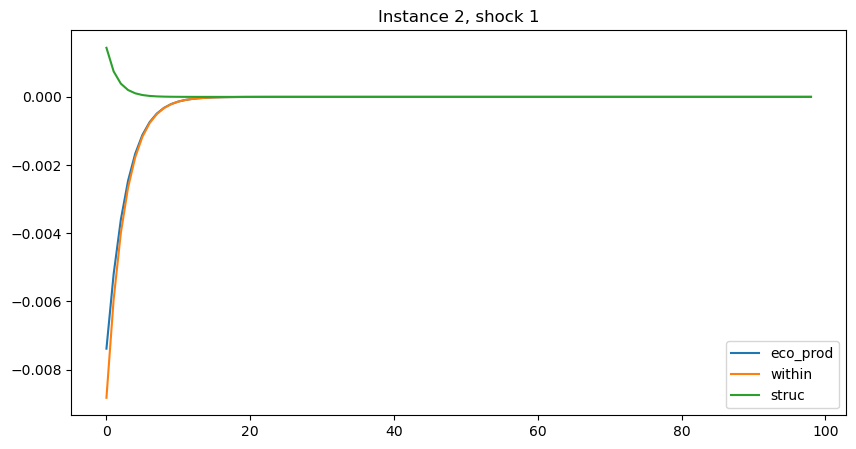

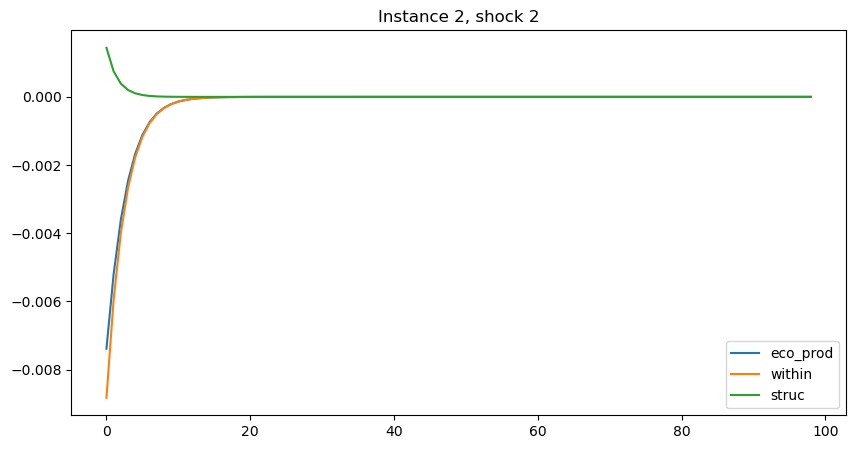

In [31]:
"""
Plot the results for each instance.

Parameters:
- ouput (list): A list of dictionaries containing the output data for each instance.

Returns:
None
"""

for i in range(3):
    for j in range(3):
        plt.figure(figsize=(10, 5))
        plt.plot(output[i*3+j][f'eco_prod_{i}_{j}'][0], label='eco_prod')
        plt.plot(output[i*3+j][f'within_{i}_{j}'][0], label='within')
        plt.plot(output[i*3+j][f'struc_{i}_{j}'][0], label='struc')
        plt.legend()
        plt.title(f'Instance {i}, shock {j}')
        plt.show()

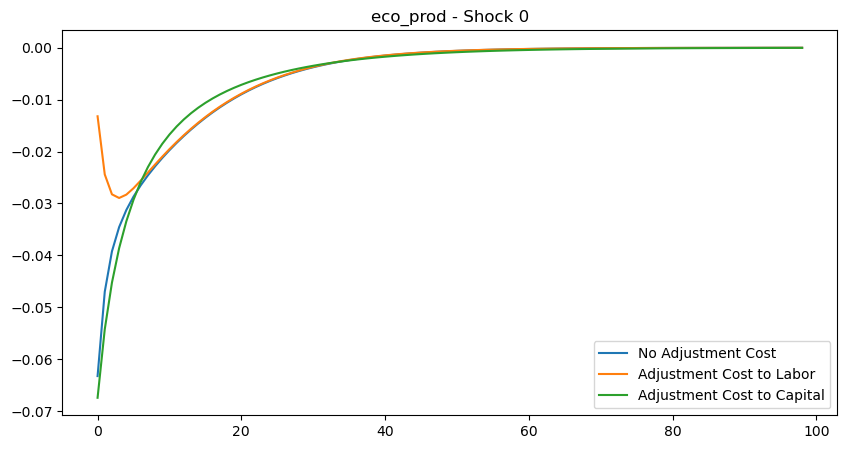

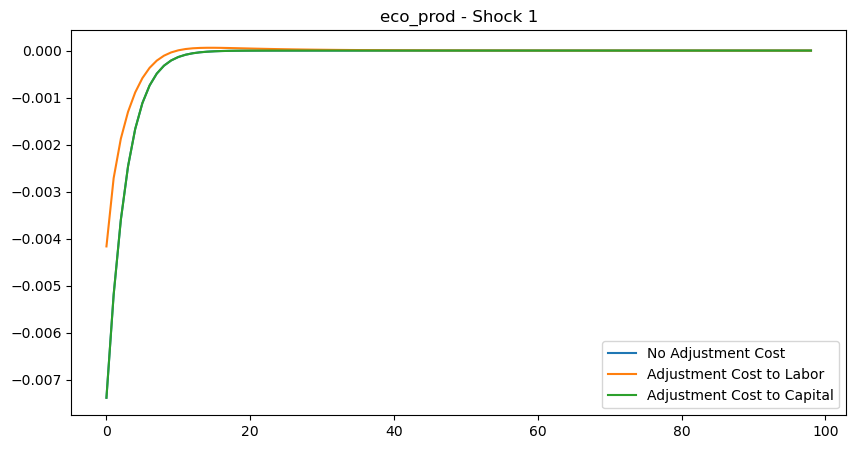

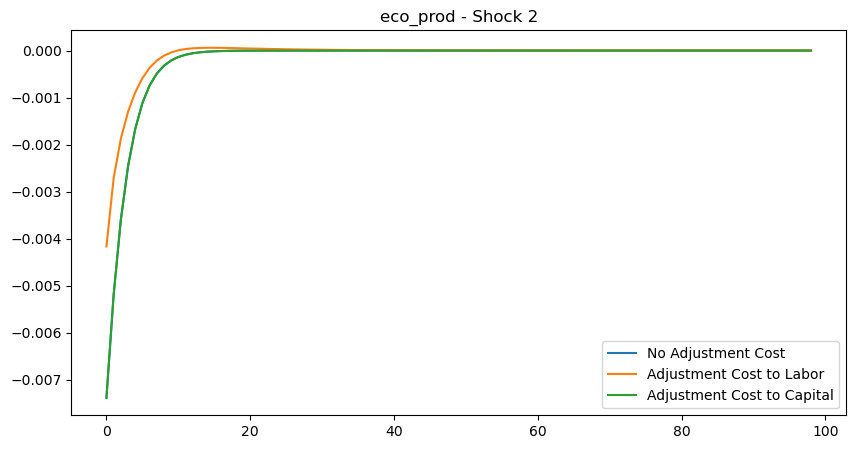

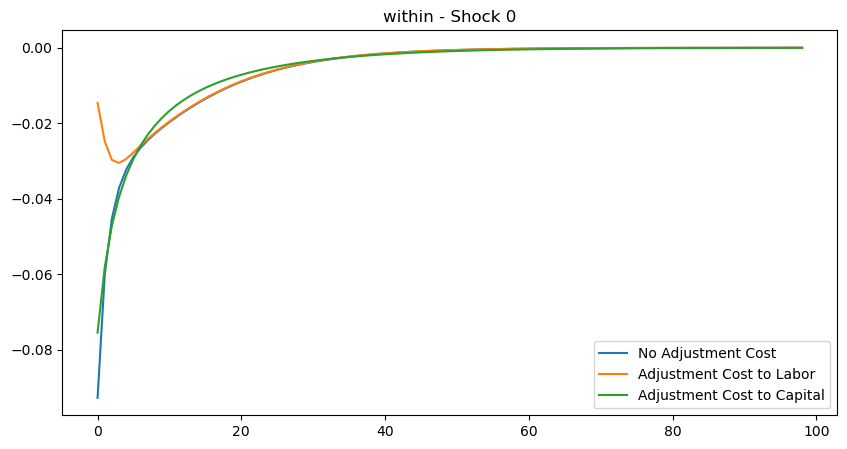

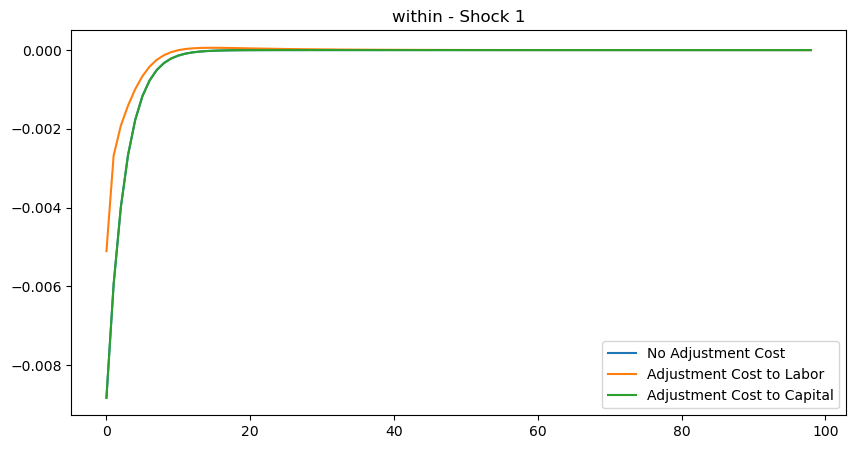

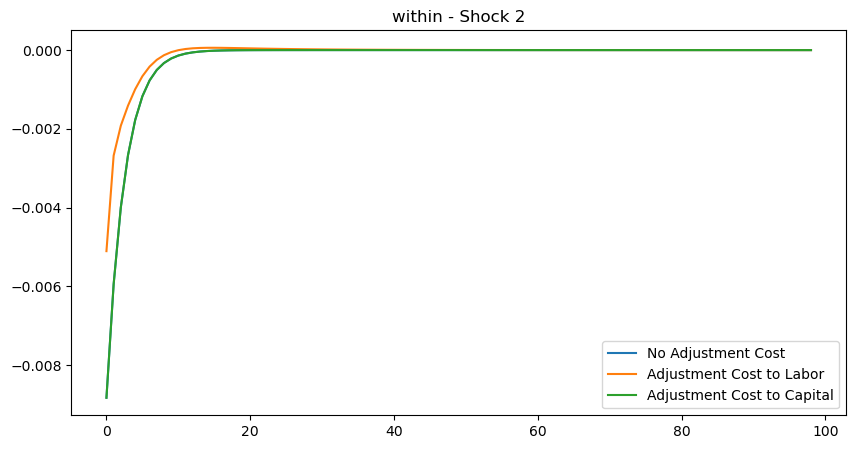

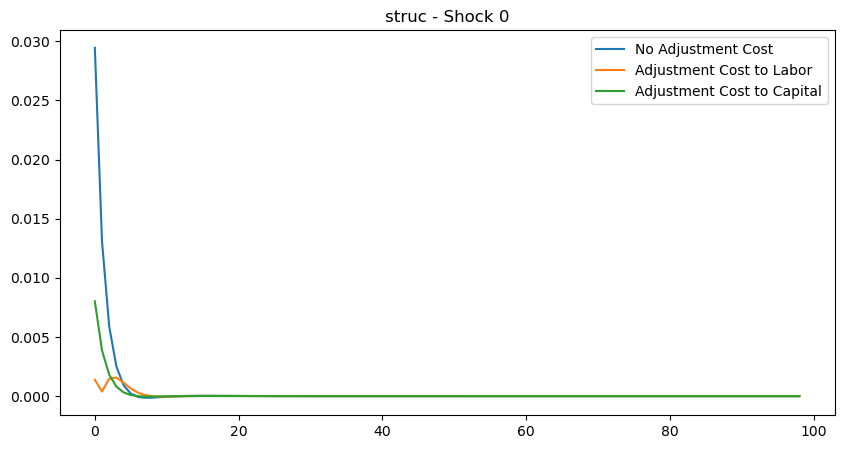

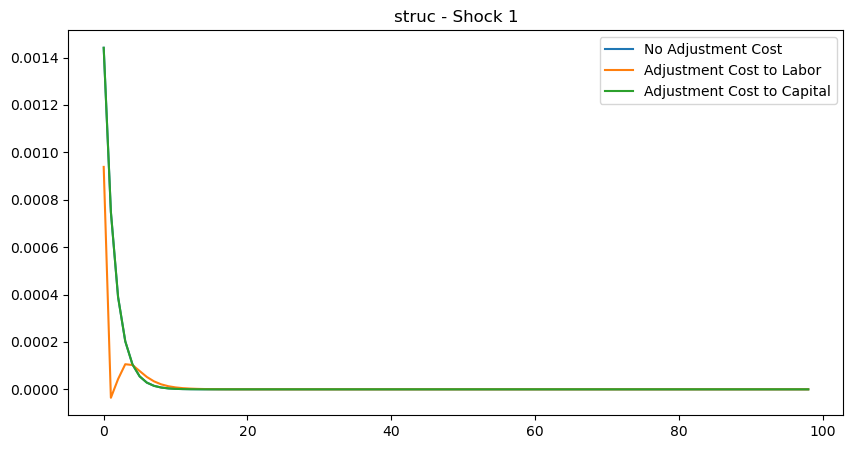

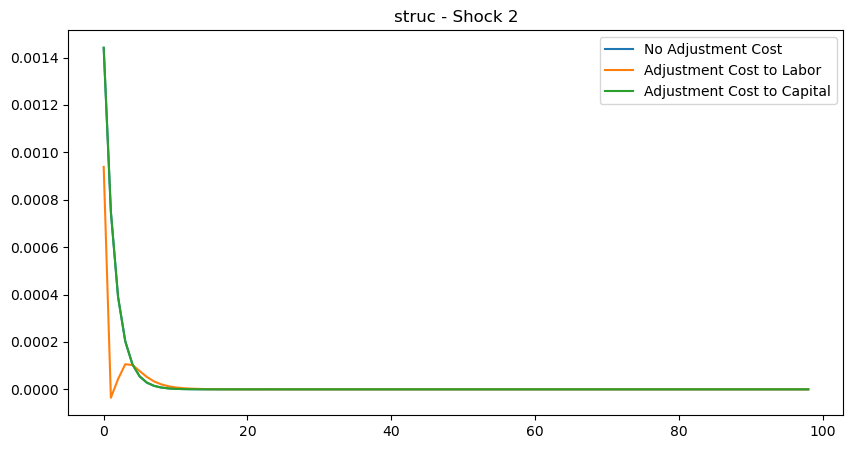

In [32]:
variables = ['eco_prod', 'within', 'struc']
instance_labels = ['No Adjustment Cost', 'Adjustment Cost to Labor', 'Adjustment Cost to Capital']  # Modify this list as per your labels

for var in variables:
    for j in range(3):
        plt.figure(figsize=(10, 5))
        for i in range(3):
            plt.plot(output[i*3+j][f'{var}_{i}_{j}'][0], label=f'{instance_labels[i]}')
        plt.legend()
        plt.title(f'{var} - Shock {j}')
        plt.show()

In [33]:
oo_0.var[0]

array([ 0.09246282, -0.04602695, -0.04643586,  0.09246282, -0.04602695,
       -0.04643586, -0.35170866, -1.01761915, -1.01761915, -1.01761915,
       -0.04551665, -0.13036743, -0.1290984 ,  0.61502953,  0.26127771,
        0.06710218,  0.07000628])

In [34]:
oo_0.var[1]

array([-0.04602695,  0.03716529,  0.00886167, -0.04602695,  0.03716529,
        0.00886167,  0.25348704,  0.5795497 ,  0.5795497 ,  0.5795497 ,
        0.02609161,  0.01946652,  0.10730535, -0.29708517, -0.12462618,
       -0.13978725,  0.06122623])

In [35]:
type(oo_0.var)

numpy.ndarray

In [36]:
import pandas as pd
df = pd.DataFrame(oo_0.var)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.092463,-0.046027,-0.046436,0.092463,-0.046027,-0.046436,-0.351709,-1.017619,-1.017619,-1.017619,-0.045517,-0.130367,-0.129098,0.615030,0.261278,0.067102,0.070006
1,-0.046027,0.037165,0.008862,-0.046027,0.037165,0.008862,0.253487,0.579550,0.579550,0.579550,0.026092,0.019467,0.107305,-0.297085,-0.124626,-0.139787,0.061226
2,-0.046436,0.008862,0.037574,-0.046436,0.008862,0.037574,0.098222,0.438069,0.438069,0.438069,0.019425,0.110901,0.021793,-0.317944,-0.136652,0.072685,-0.131233
3,0.092463,-0.046027,-0.046436,0.092463,-0.046027,-0.046436,-0.351709,-1.017619,-1.017619,-1.017619,-0.045517,-0.130367,-0.129098,0.615030,0.261278,0.067102,0.070006
4,-0.046027,0.037165,0.008862,-0.046027,0.037165,0.008862,0.253487,0.579550,0.579550,0.579550,0.026092,0.019467,0.107305,-0.297085,-0.124626,-0.139787,0.061226
5,-0.046436,0.008862,0.037574,-0.046436,0.008862,0.037574,0.098222,0.438069,0.438069,0.438069,0.019425,0.110901,0.021793,-0.317944,-0.136652,0.072685,-0.131233
6,-0.351709,0.253487,0.098222,-0.351709,0.253487,0.098222,248.017101,245.390554,245.390554,245.390554,16.439184,11.184952,11.666810,14.896075,11.182751,-0.841220,0.261481
7,-1.017619,0.579550,0.438069,-1.017619,0.579550,0.438069,245.390554,248.015981,248.015981,248.015981,16.586734,12.342082,12.781159,9.775372,8.902249,-0.811362,0.193437
8,-1.017619,0.579550,0.438069,-1.017619,0.579550,0.438069,245.390554,248.015981,248.015981,248.015981,16.586734,12.342082,12.781159,9.775372,8.902249,-0.811362,0.193437
9,-1.017619,0.579550,0.438069,-1.017619,0.579550,0.438069,245.390554,248.015981,248.015981,248.015981,16.586734,12.342082,12.781159,9.775372,8.902249,-0.811362,0.193437


In [37]:
ss_dict

{'n_0': 0.4367816091954019,
 'n_1': 0.2816091954023412,
 'n_2': 0.2816091954022568,
 's_0': 0.43678160919539893,
 's_1': 0.28160919540229046,
 's_2': 0.28160919540231055,
 'k': 9.63139120095133,
 'k_0': 9.631391200951322,
 'k_1': 9.631391200951327,
 'k_2': 9.631391200951319,
 'c_0': 0.8739595719381731,
 'c_1': 0.873959571938196,
 'c_2': 0.8739595719381466,
 'i': 0.4815695600475665,
 'a_0': 0,
 'a_1': 0,
 'a_2': 0}

In [38]:


# Assuming oo_0.var is a NumPy array
data = oo_0.var

# Convert to DataFrame
df = pd.DataFrame(data)

# Define a function to highlight the diagonal
def highlight_diagonal(x):
	df = pd.DataFrame('', index=x.index, columns=x.columns)
	np.fill_diagonal(df.values, 'background-color: yellow')
	return df

# Apply the highlighting function to the DataFrame
df.style.apply(highlight_diagonal, axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.092463,-0.046027,-0.046436,0.092463,-0.046027,-0.046436,-0.351709,-1.017619,-1.017619,-1.017619,-0.045517,-0.130367,-0.129098,0.615030,0.261278,0.067102,0.070006
1,-0.046027,0.037165,0.008862,-0.046027,0.037165,0.008862,0.253487,0.579550,0.579550,0.579550,0.026092,0.019467,0.107305,-0.297085,-0.124626,-0.139787,0.061226
2,-0.046436,0.008862,0.037574,-0.046436,0.008862,0.037574,0.098222,0.438069,0.438069,0.438069,0.019425,0.110901,0.021793,-0.317944,-0.136652,0.072685,-0.131233
3,0.092463,-0.046027,-0.046436,0.092463,-0.046027,-0.046436,-0.351709,-1.017619,-1.017619,-1.017619,-0.045517,-0.130367,-0.129098,0.615030,0.261278,0.067102,0.070006
4,-0.046027,0.037165,0.008862,-0.046027,0.037165,0.008862,0.253487,0.579550,0.579550,0.579550,0.026092,0.019467,0.107305,-0.297085,-0.124626,-0.139787,0.061226
5,-0.046436,0.008862,0.037574,-0.046436,0.008862,0.037574,0.098222,0.438069,0.438069,0.438069,0.019425,0.110901,0.021793,-0.317944,-0.136652,0.072685,-0.131233
6,-0.351709,0.253487,0.098222,-0.351709,0.253487,0.098222,248.017101,245.390554,245.390554,245.390554,16.439184,11.184952,11.666810,14.896075,11.182751,-0.841220,0.261481
7,-1.017619,0.579550,0.438069,-1.017619,0.579550,0.438069,245.390554,248.015981,248.015981,248.015981,16.586734,12.342082,12.781159,9.775372,8.902249,-0.811362,0.193437
8,-1.017619,0.579550,0.438069,-1.017619,0.579550,0.438069,245.390554,248.015981,248.015981,248.015981,16.586734,12.342082,12.781159,9.775372,8.902249,-0.811362,0.193437
9,-1.017619,0.579550,0.438069,-1.017619,0.579550,0.438069,245.390554,248.015981,248.015981,248.015981,16.586734,12.342082,12.781159,9.775372,8.902249,-0.811362,0.193437


In [39]:
num_items = len(ss_dict)
print(num_items)

17


In [40]:

# Assuming oo_0.var is a NumPy array
data = oo_0.var

# Convert to DataFrame
df = pd.DataFrame(data)

# Define a function to highlight the diagonal
def highlight_diagonal(x):
	df = pd.DataFrame('', index=x.index, columns=x.columns)
	np.fill_diagonal(df.values, 'background-color: yellow')
	return df

# Apply the highlighting function to the DataFrame and round to three digits
df.style.apply(highlight_diagonal, axis=None).format(precision=3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
3,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
4,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
5,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
6,-0.352,0.253,0.098,-0.352,0.253,0.098,248.017,245.391,245.391,245.391,16.439,11.185,11.667,14.896,11.183,-0.841,0.261
7,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
8,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
9,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193


In [41]:
t[2].var

array([[ 3.21816443e-02, -1.62466871e-02, -1.59349571e-02,
         3.21816443e-02, -1.62466871e-02, -1.59349571e-02,
        -4.60823802e-01, -7.22715890e-01, -7.22715890e-01,
        -7.22715890e-01,  5.45844852e-03, -2.33425208e-02,
        -2.43099587e-02,  2.25756293e-01,  1.34411319e-01,
         6.85021619e-02,  6.62882426e-02],
       [-1.62466871e-02,  2.24553149e-02, -6.20862773e-03,
        -1.62466871e-02,  2.24553149e-02, -6.20862773e-03,
         2.93541348e-01,  4.18943285e-01,  4.18943285e-01,
         4.18943285e-01,  5.66336116e-04, -3.40836508e-02,
         5.48734125e-02, -1.04454773e-01, -6.11929876e-02,
        -1.40487243e-01,  6.30852471e-02],
       [-1.59349571e-02, -6.20862773e-03,  2.21435849e-02,
        -1.59349571e-02, -6.20862773e-03,  2.21435849e-02,
         1.67282454e-01,  3.03772605e-01,  3.03772605e-01,
         3.03772605e-01, -6.02478464e-03,  5.74261716e-02,
        -3.05634538e-02, -1.21301521e-01, -7.32183312e-02,
         7.19850815e-02, -1.2

In [42]:
import pandas as pd
import numpy as np

# Assuming oo_0.var is a NumPy array and ss_dict is a dictionary
data = oo_0.var


# Convert to DataFrame
df = pd.DataFrame(data)

# Set the index and columns names from ss_dict
df.index = ss_dict.keys()
df.columns = ss_dict.keys()

# Define a function to highlight the diagonal
def highlight_diagonal(x):
	df = pd.DataFrame('', index=x.index, columns=x.columns)
	np.fill_diagonal(df.values, 'background-color: yellow')
	return df

# Apply the highlighting function to the DataFrame and round to three digits
df.style.apply(highlight_diagonal, axis=None).format(precision=3)

,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
n_1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
n_2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
s_0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
s_1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
s_2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
k,-0.352,0.253,0.098,-0.352,0.253,0.098,248.017,245.391,245.391,245.391,16.439,11.185,11.667,14.896,11.183,-0.841,0.261
k_0,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
k_1,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
k_2,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193


In [43]:
ss_dict

{'n_0': 0.4367816091954019,
 'n_1': 0.2816091954023412,
 'n_2': 0.2816091954022568,
 's_0': 0.43678160919539893,
 's_1': 0.28160919540229046,
 's_2': 0.28160919540231055,
 'k': 9.63139120095133,
 'k_0': 9.631391200951322,
 'k_1': 9.631391200951327,
 'k_2': 9.631391200951319,
 'c_0': 0.8739595719381731,
 'c_1': 0.873959571938196,
 'c_2': 0.8739595719381466,
 'i': 0.4815695600475665,
 'a_0': 0,
 'a_1': 0,
 'a_2': 0}

In [44]:
type(t)

list

In [45]:

for i in range(len(t)):
    print(f"Type of t[{i}]:", type(t[i]))

Type of t[0]: <class 'MyPy.DyPy'>
Type of t[1]: <class 'MyPy.DyPy'>
Type of t[2]: <class 'MyPy.DyPy'>


In [46]:
#Define a function to highlight the diagonal
def highlight_diagonal(x):
	df = pd.DataFrame('', index=x.index, columns=x.columns)
	np.fill_diagonal(df.values, 'background-color: yellow')
	return df 

In [47]:
for i in range(len(t)):
    data = t[i].var


    # Convert to DataFrame
    df = pd.DataFrame(data)

# Set the index and columns names from ss_dict
    df.index = ss_dict.keys()
    df.columns = ss_dict.keys()

  

# Apply the highlighting function to the DataFrame and round to three digits
    df.style.apply(highlight_diagonal, axis=None).format(precision=3)

In [48]:
import pandas as pd
import numpy as np
from IPython.display import display

# Assuming t is a list with three elements and ss_dict is a dictionary
# Example data


# Define a function to highlight the diagonal
def highlight_diagonal(x):
	df = pd.DataFrame('', index=x.index, columns=x.columns)
	np.fill_diagonal(df.values, 'background-color: yellow')
	return df

# Iterate through the list and process each element
for i in range(len(t)):
	data = t[i].var

	# Convert to DataFrame
	df = pd.DataFrame(data)

	# Set the index and columns names from ss_dict
	df.index = ss_dict.keys()
	df.columns = ss_dict.keys()

	# Apply the highlighting function to the DataFrame and round to three digits
	styled_df = df.style.apply(highlight_diagonal, axis=None).format(precision=3)
	
	# Display the styled DataFrame
	display(styled_df)

,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
n_1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
n_2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
s_0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
s_1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
s_2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
k,-0.352,0.253,0.098,-0.352,0.253,0.098,248.017,245.391,245.391,245.391,16.439,11.185,11.667,14.896,11.183,-0.841,0.261
k_0,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
k_1,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
k_2,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193


,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.038,-0.019,-0.019,0.051,-0.025,-0.026,-0.493,-0.560,-1.059,-1.065,-0.036,-0.066,-0.066,0.308,0.142,0.047,0.048
n_1,-0.019,0.018,0.001,-0.025,0.024,0.002,0.313,0.344,0.682,0.499,0.021,-0.002,0.067,-0.146,-0.066,-0.102,0.047
n_2,-0.019,0.001,0.018,-0.026,0.002,0.024,0.180,0.216,0.377,0.566,0.015,0.069,-0.001,-0.162,-0.076,0.055,-0.095
s_0,0.051,-0.025,-0.026,0.077,-0.038,-0.039,-0.368,-0.330,-1.348,-1.357,-0.030,-0.084,-0.083,0.493,0.242,0.064,0.067
s_1,-0.025,0.024,0.002,-0.038,0.036,0.002,0.259,0.236,0.934,0.549,0.018,-0.012,0.092,-0.236,-0.115,-0.147,0.071
s_2,-0.026,0.002,0.024,-0.039,0.002,0.036,0.108,0.094,0.414,0.808,0.012,0.097,-0.009,-0.257,-0.127,0.084,-0.138
k,-0.493,0.313,0.180,-0.368,0.259,0.108,222.083,222.743,218.153,217.542,14.751,10.007,10.474,13.097,10.108,-0.986,0.053
k_0,-0.560,0.344,0.216,-0.330,0.236,0.094,222.743,225.764,217.007,216.496,14.953,10.433,10.876,13.090,10.250,-0.549,0.437
k_1,-1.059,0.682,0.377,-1.348,0.934,0.414,218.153,217.007,232.032,224.662,14.696,10.497,12.111,5.928,6.373,-2.455,0.855
k_2,-1.065,0.499,0.566,-1.357,0.549,0.808,217.542,216.496,224.662,231.182,14.691,11.780,10.978,5.757,6.284,0.045,-1.451


,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.032,-0.016,-0.016,0.032,-0.016,-0.016,-0.461,-0.723,-0.723,-0.723,0.005,-0.023,-0.024,0.226,0.134,0.069,0.066
n_1,-0.016,0.022,-0.006,-0.016,0.022,-0.006,0.294,0.419,0.419,0.419,0.001,-0.034,0.055,-0.104,-0.061,-0.140,0.063
n_2,-0.016,-0.006,0.022,-0.016,-0.006,0.022,0.167,0.304,0.304,0.304,-0.006,0.057,-0.031,-0.121,-0.073,0.072,-0.129
s_0,0.032,-0.016,-0.016,0.032,-0.016,-0.016,-0.461,-0.723,-0.723,-0.723,0.005,-0.023,-0.024,0.226,0.134,0.069,0.066
s_1,-0.016,0.022,-0.006,-0.016,0.022,-0.006,0.294,0.419,0.419,0.419,0.001,-0.034,0.055,-0.104,-0.061,-0.140,0.063
s_2,-0.016,-0.006,0.022,-0.016,-0.006,0.022,0.167,0.304,0.304,0.304,-0.006,0.057,-0.031,-0.121,-0.073,0.072,-0.129
k,-0.461,0.294,0.167,-0.461,0.294,0.167,177.455,176.029,176.029,176.029,12.323,8.274,8.666,10.227,8.552,-0.713,0.183
k_0,-0.723,0.419,0.304,-0.723,0.419,0.304,176.029,177.454,177.454,177.454,12.027,8.751,9.108,7.448,6.810,-0.687,0.131
k_1,-0.723,0.419,0.304,-0.723,0.419,0.304,176.029,177.454,177.454,177.454,12.027,8.751,9.108,7.448,6.810,-0.687,0.131
k_2,-0.723,0.419,0.304,-0.723,0.419,0.304,176.029,177.454,177.454,177.454,12.027,8.751,9.108,7.448,6.810,-0.687,0.131


In [51]:
import pandas as pd
import numpy as np
from IPython.display import display

# Assuming t is a list with three elements and ss_dict is a dictionary
# Example data
# t = [obj1, obj2, obj3]  # Replace with actual objects that have a .var attribute
# ss_dict = {'row1': 'col1', 'row2': 'col2', 'row3': 'col3'}  # Example dictionary

# Define a function to highlight the diagonal
def highlight_diagonal(x):
	df = pd.DataFrame('', index=x.index, columns=x.columns)
	np.fill_diagonal(df.values, 'background-color: yellow')
	return df

# Iterate through the list and process each element
for i in range(len(t)):
	data = t[i].var

	# Convert to DataFrame
	df = pd.DataFrame(data)

	# Set the index and columns names from ss_dict
	df.index = ss_dict.keys()
	df.columns = ss_dict.keys()

	# Apply the highlighting function to the DataFrame and round to three digits
	styled_df = df.style.apply(highlight_diagonal, axis=None).format(precision=3)
	
	# Set smaller font size
	styled_df = styled_df.set_table_styles([{
		'selector': 'table',
		'props': [('font-size', '6pt')]
	}])
	
	# Display the styled DataFrame
	display(styled_df)

,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
n_1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
n_2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
s_0,0.092,-0.046,-0.046,0.092,-0.046,-0.046,-0.352,-1.018,-1.018,-1.018,-0.046,-0.130,-0.129,0.615,0.261,0.067,0.070
s_1,-0.046,0.037,0.009,-0.046,0.037,0.009,0.253,0.580,0.580,0.580,0.026,0.019,0.107,-0.297,-0.125,-0.140,0.061
s_2,-0.046,0.009,0.038,-0.046,0.009,0.038,0.098,0.438,0.438,0.438,0.019,0.111,0.022,-0.318,-0.137,0.073,-0.131
k,-0.352,0.253,0.098,-0.352,0.253,0.098,248.017,245.391,245.391,245.391,16.439,11.185,11.667,14.896,11.183,-0.841,0.261
k_0,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
k_1,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193
k_2,-1.018,0.580,0.438,-1.018,0.580,0.438,245.391,248.016,248.016,248.016,16.587,12.342,12.781,9.775,8.902,-0.811,0.193


,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.038,-0.019,-0.019,0.051,-0.025,-0.026,-0.493,-0.560,-1.059,-1.065,-0.036,-0.066,-0.066,0.308,0.142,0.047,0.048
n_1,-0.019,0.018,0.001,-0.025,0.024,0.002,0.313,0.344,0.682,0.499,0.021,-0.002,0.067,-0.146,-0.066,-0.102,0.047
n_2,-0.019,0.001,0.018,-0.026,0.002,0.024,0.180,0.216,0.377,0.566,0.015,0.069,-0.001,-0.162,-0.076,0.055,-0.095
s_0,0.051,-0.025,-0.026,0.077,-0.038,-0.039,-0.368,-0.330,-1.348,-1.357,-0.030,-0.084,-0.083,0.493,0.242,0.064,0.067
s_1,-0.025,0.024,0.002,-0.038,0.036,0.002,0.259,0.236,0.934,0.549,0.018,-0.012,0.092,-0.236,-0.115,-0.147,0.071
s_2,-0.026,0.002,0.024,-0.039,0.002,0.036,0.108,0.094,0.414,0.808,0.012,0.097,-0.009,-0.257,-0.127,0.084,-0.138
k,-0.493,0.313,0.180,-0.368,0.259,0.108,222.083,222.743,218.153,217.542,14.751,10.007,10.474,13.097,10.108,-0.986,0.053
k_0,-0.560,0.344,0.216,-0.330,0.236,0.094,222.743,225.764,217.007,216.496,14.953,10.433,10.876,13.090,10.250,-0.549,0.437
k_1,-1.059,0.682,0.377,-1.348,0.934,0.414,218.153,217.007,232.032,224.662,14.696,10.497,12.111,5.928,6.373,-2.455,0.855
k_2,-1.065,0.499,0.566,-1.357,0.549,0.808,217.542,216.496,224.662,231.182,14.691,11.780,10.978,5.757,6.284,0.045,-1.451


,n_0,n_1,n_2,s_0,s_1,s_2,k,k_0,k_1,k_2,c_0,c_1,c_2,i,a_0,a_1,a_2
n_0,0.032,-0.016,-0.016,0.032,-0.016,-0.016,-0.461,-0.723,-0.723,-0.723,0.005,-0.023,-0.024,0.226,0.134,0.069,0.066
n_1,-0.016,0.022,-0.006,-0.016,0.022,-0.006,0.294,0.419,0.419,0.419,0.001,-0.034,0.055,-0.104,-0.061,-0.140,0.063
n_2,-0.016,-0.006,0.022,-0.016,-0.006,0.022,0.167,0.304,0.304,0.304,-0.006,0.057,-0.031,-0.121,-0.073,0.072,-0.129
s_0,0.032,-0.016,-0.016,0.032,-0.016,-0.016,-0.461,-0.723,-0.723,-0.723,0.005,-0.023,-0.024,0.226,0.134,0.069,0.066
s_1,-0.016,0.022,-0.006,-0.016,0.022,-0.006,0.294,0.419,0.419,0.419,0.001,-0.034,0.055,-0.104,-0.061,-0.140,0.063
s_2,-0.016,-0.006,0.022,-0.016,-0.006,0.022,0.167,0.304,0.304,0.304,-0.006,0.057,-0.031,-0.121,-0.073,0.072,-0.129
k,-0.461,0.294,0.167,-0.461,0.294,0.167,177.455,176.029,176.029,176.029,12.323,8.274,8.666,10.227,8.552,-0.713,0.183
k_0,-0.723,0.419,0.304,-0.723,0.419,0.304,176.029,177.454,177.454,177.454,12.027,8.751,9.108,7.448,6.810,-0.687,0.131
k_1,-0.723,0.419,0.304,-0.723,0.419,0.304,176.029,177.454,177.454,177.454,12.027,8.751,9.108,7.448,6.810,-0.687,0.131
k_2,-0.723,0.419,0.304,-0.723,0.419,0.304,176.029,177.454,177.454,177.454,12.027,8.751,9.108,7.448,6.810,-0.687,0.131
